<a href="https://colab.research.google.com/github/Maxim687/Machine-learning/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_3_1_%D0%A2%D0%B8%D0%BC%D0%BE%D1%89%D1%83%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing_data = fetch_california_housing()
df_housing = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
df_housing['target'] = housing_data.target
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#Завдання 1
#Провести попередній аналіз даних за схемою.

df_housing.isnull().sum()
df_housing.fillna(df_housing.mean(), inplace=True)

df_housing.duplicated().sum()
df_housing.drop_duplicates(inplace=True)

for col in df_housing.columns:
    unique_values = df_housing[col].unique()
    if len(unique_values) == 2:
        print(f"Бінарна ознака: {col}, Унікальні значення: {unique_values}")

df_housing.dtypes
df_housing = df_housing.astype(float)

In [ ]:
#Завдання 2
#Масштабувати ознаки.

from sklearn.preprocessing import StandardScaler

scaler_housing = StandardScaler()
df_housing_scaled = scaler_housing.fit_transform(df_housing.drop('target', axis=1))

In [ ]:
#Завдання 3
#Поділити дані на тренувальні і тестові.

from sklearn.model_selection import train_test_split

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(df_housing_scaled, df_housing['target'], test_size=0.2, random_state=42)

In [ ]:
#Завдання 4
#Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge. Підібрати оптимальні параметри за допомогою GridSeach.

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

lin_reg_h = LinearRegression()
lin_reg_h.fit(X_train_h, y_train_h)

rf_reg_h = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg_h.fit(X_train_h, y_train_h)

ridge = Ridge()
parameters = {'alpha': [0.1, 1, 10]}
grid = GridSearchCV(ridge, parameters, cv=5)
grid.fit(X_train_h, y_train_h)

ridge_best = grid.best_estimator_

In [ ]:
#Завдання 5
#Вивести R² I MSE. Побудувати графіки.

from sklearn.metrics import r2_score, mean_squared_error

y_pred_lin_h = lin_reg_h.predict(X_test_h)
y_pred_rf_h = rf_reg_h.predict(X_test_h)
y_pred_ridge_h = ridge_best.predict(X_test_h)

r2_lin_h = r2_score(y_test_h, y_pred_lin_h)
r2_rf_h = r2_score(y_test_h, y_pred_rf_h)
r2_ridge_h = r2_score(y_test_h, y_pred_ridge_h)

mse_lin_h = mean_squared_error(y_test_h, y_pred_lin_h)
mse_rf_h = mean_squared_error(y_test_h, y_pred_rf_h)
mse_ridge_h = mean_squared_error(y_test_h, y_pred_ridge_h)

print(f'Лінійна регресія - R2: {r2_lin_h}, MSE: {mse_lin_h}')
print(f'RandomForest регресія - R2: {r2_rf_h}, MSE: {mse_rf_h}')
print(f'Ridge регресія - R2: {r2_ridge_h}, MSE: {mse_ridge_h}')

Лінійна регресія - R2: 0.5757877060324511, MSE: 0.555891598695244
RandomForest регресія - R2: 0.805024407701793, MSE: 0.25549776668540763
Ridge регресія - R2: 0.5757907979394903, MSE: 0.5558875470324999


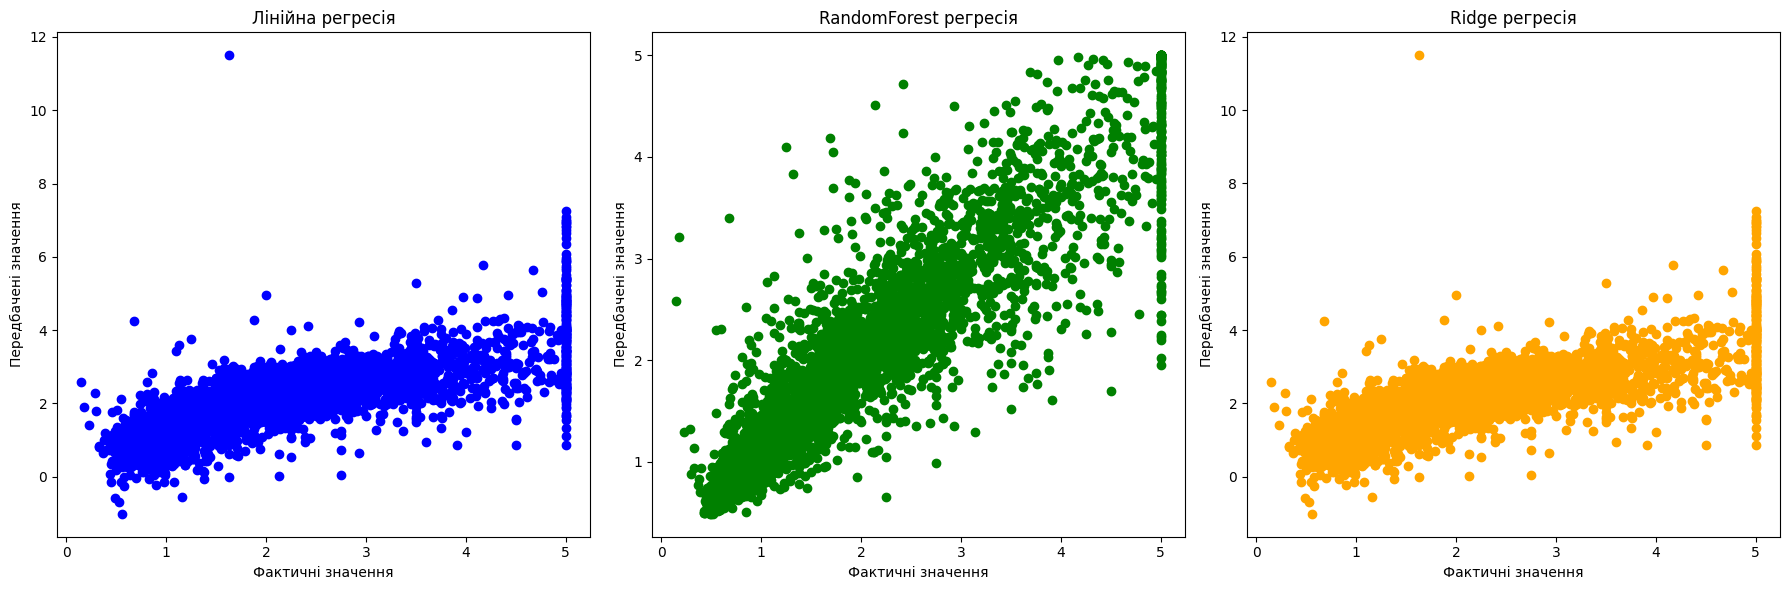

In [ ]:
import matplotlib.pyplot as plt

y_pred_lin_reg = lin_reg_h.predict(X_test_h)
y_pred_rf = rf_reg_h.predict(X_test_h)
y_pred_ridge = ridge_best.predict(X_test_h)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test_h, y_pred_lin_reg, color='blue')
plt.title('Лінійна регресія')
plt.xlabel('Фактичні значення')
plt.ylabel('Передбачені значення')

plt.subplot(1, 3, 2)
plt.scatter(y_test_h, y_pred_rf, color='green')
plt.title('RandomForest регресія')
plt.xlabel('Фактичні значення')
plt.ylabel('Передбачені значення')

plt.subplot(1, 3, 3)
plt.scatter(y_test_h, y_pred_ridge, color='orange')
plt.title('Ridge регресія')
plt.xlabel('Фактичні значення')
plt.ylabel('Передбачені значення')

plt.tight_layout()
plt.show()

Завдання 6 Зробити ВИСНОВКИ.

Лінійна регресія:

Коефіцієнт детермінації (R²) становить 0.5758, що вказує на середню точність моделі, пояснюючи приблизно 57.6% варіації цільової змінної. Середньоквадратична помилка (MSE) дорівнює 0.5559, що свідчить про помірні відхилення в передбаченнях.

RandomForest регресія:

R² дорівнює 0.8050, що демонструє високу точність моделі, пояснюючи 80.5% варіації в даних. MSE становить 0.2555, що значно нижче, ніж у лінійної регресії, підтверджуючи точніші передбачення.

Ridge регресія:

R² дорівнює 0.5758, а MSE — 0.5559, що дуже схоже на результати лінійної регресії. Модель не забезпечила значних покращень порівняно з лінійною регресією.